# <font color="purple">**Licenciatura en Tecnologías para la Información en Ciencias**</font>

## <font color="blue">**Procesamiento Digital de Imágenes**</font>

### <font color="blue">**Tareas 4: Transformaciones afines**</font>

### Angélica Nayeli Rivas Bedolla:    418128734

### Semestre 2021-1

### Miércoles 18 de noviembre de 2020

# Introducción

"Una transformación del plano $R^2$ es una función biyectiva $T : R^2 → R^2$ que es continua y cuya inversa también es continua" [1]. 

Existen ocho tipos de transformaciones afines:
 - La identidad. $$\begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\  0 & 0 & 1 
\end{pmatrix}\begin{pmatrix} x\\ y\\ 1 \end{pmatrix}=\begin{pmatrix} 1x\\ 1y\\  1  \end{pmatrix}$$
 - Reflexión sobre Y. $$\begin{pmatrix} -1 & 0 & 0 \\ 0 & 1 & 0 \\  0 & 0 & 1 
\end{pmatrix}\begin{pmatrix} x\\ y\\ 1 \end{pmatrix}=\begin{pmatrix} -1x\\ 1y\\  1  \end{pmatrix}$$
 - Reflexión sobre X. $$\begin{pmatrix} 1 & 0 & 0 \\ 0 & -1 & 0 \\  0 & 0 & 1 
\end{pmatrix}\begin{pmatrix} x\\ y\\ 1 \end{pmatrix}=\begin{pmatrix} 1x\\ -1y\\  1  \end{pmatrix}$$
 - Reflexión sobre la recta X=Y. $$\begin{pmatrix} 0 & 1 & 0 \\ 1 & 0 & 0 \\  0 & 0 & 1  \end{pmatrix}\begin{pmatrix} x\\ y\\ 1 \end{pmatrix}=\begin{pmatrix} 1y\\ 1x\\  1  \end{pmatrix}$$
 - Elongación. $$\begin{pmatrix} H & 0 & 0 \\ 0 & W & 0 \\  0 & 0 & 1 
\end{pmatrix}\begin{pmatrix} x\\ y\\ 1 \end{pmatrix}=\begin{pmatrix} Hx\\ Wy\\  1  \end{pmatrix}$$
 - Cizallamieno. $$\begin{pmatrix} 1 & k & 0 \\ r & 1 & 0 \\  0 & 0 & 1 
\end{pmatrix}\begin{pmatrix} x\\ y\\ 1 \end{pmatrix}=\begin{pmatrix} x+ky\\ rx+y\\  1  \end{pmatrix}$$
 - Traslación. $$\begin{pmatrix} a_1 & a_2 & t_{\overrightarrow{x}} \\ b_1 & b_2 & t_{\overrightarrow{y}} \\ 0 & 0 & 1 \end{pmatrix}\begin{pmatrix} x\\  y\\  1 \end{pmatrix}=\begin{pmatrix} a_1x+a_2y + t_{\overrightarrow{x}} \\ b_1x+b_2y + t_{\overrightarrow{y}} \\  1  \end{pmatrix}$$

 - Rotación respecto al origen. $$\begin{pmatrix} cos\theta & sen\theta & 0 \\ -sen\theta & cos\theta & 0 \\  0 & 0 & 1 \end{pmatrix}\begin{pmatrix} x\\ y\\ 1 \end{pmatrix}=\begin{pmatrix} cos\theta x+sen\theta y\\ -sen\theta x+cos\theta y\\  1  \end{pmatrix}$$


# Enunciado del problema

 1. Realizar la implementación de la transformación a fin. El programa debe recibir una imagen en grises y una matriz de transformación. Como salida el programa debe regresar la imagen con la transformación afin aplicada.
 2. La imagen de salida en la transformación a fin, tendrá puntos faltantes. Para resolver este problema se deben cubrir utilizando el procedimiento de interpolación bicúbica.

# Código fuente

In [ ]:
#Cargar bibliotecas necesarias
import numpy as np
import cv2
import matplotlib.pyplot as plt 

## Leo la imagen

In [ ]:
img = cv2.imread("ave.jpg", 0) 

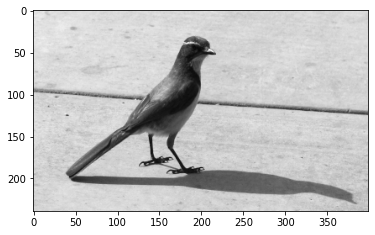

In [ ]:
plt.imshow(img, "gray")

## Función de interpolación 

Implementación de la interpolación Bi-cuadrática que toma el promedio de la vecindad de $3\times 3$ pixeles.


### Función SubMatriz implementada en tarea 2

In [ ]:
def SubMatriz(img, coordenadas, k):
    """
    Recibe:
        img: imagen de cve que se puede tratar con numpy.
        coordenadas: tupla x,y que es el centro de la submatriz
        k: tamaño en x & en y de la submatriz. Siempre impar.
    Regresa: 
        submatriz de tamaño kxk con centro en coordenadas.
    """
    desplazamiento = k//2 #es el numero de unidades que se tendrá que desplazar las coordenadas para crear las esquinas de la nueva submatriz
    superior_izquierdo = (coordenadas[0]-desplazamiento, coordenadas[1]-desplazamiento) #la coordenada de la esquina superior izquierda (fila, columna)

    return img[superior_izquierdo[1]:superior_izquierdo[1]+k, superior_izquierdo[0]:superior_izquierdo[0]+k] #devuelvo el slice de la matriz

### Interpolación Bi-cuadrática
Como la función de transformaciones afines empieza con valores negativos (-1) esta función solo calcula la interpolación cuando el valor del pixel _actual_ es -1.

Esta función al ser cuadrática hace que el algoritmo sea ineficiente porque tiene que pasar dos veces por toda la imagen (contando la de transformaciones afines).

In [ ]:
def Interpolacion(img):
    """
    Bi-cuadratica: Toma el valor promediando una vecindad de 3 × 3 pixeles.
    Creada específicamente para obtener el valor de los que son -1.
    Recibe:
        img: imagen a la cual poner el filtro
    Devuelve:
        imagen con interpolación aplicado
    """
    #Creo el padding
    color = [0,0,0]
    constant = cv2.copyMakeBorder(img.copy(),1,1,1,1,cv2.BORDER_CONSTANT,value=color)

    #obtener el tamaño de la imagen original
    tamanio = img.shape #está presentado como (y, x)

    #donde guardaré la nueva imagen
    nueva_imagen = np.zeros((tamanio[0], tamanio[1])) 

    for i in range(tamanio[0]): #por cada fila
        for j in range(tamanio[1]): #por cada columna
            if constant[i+1][j+1] == -1: #si no es un valor de la imagen, obtenemos su interpolación
                nueva_imagen[i][j] = np.mean(SubMatriz(constant, (j+1, i+1), 3))
            else: #si es un valor de la imagen copiamos el valor
                nueva_imagen[i][j] = constant[i+1][j+1]

    return nueva_imagen

## Transformación de coordenadas de matriz a cordenadas $R^2$

Una matriz nombra sus filas de arriba hacia abajo:

         _0_  *  *  *  *
         _1_  *  *  *  *
         _2_  *  *  *  *
         _3_  *  *  *  *
         _4_  *  *  *  *
         _5_  *  *  *  *

En el plano 2D ($R^2$) se leen de abajo hacia arriba:

         _2_  *  *  *  *
         _1_  *  *  *  *
         _0_  *  *  *  *
        _-1_  *  *  *  *
        _-2_  *  *  *  *

Se tiene que pensar en una política donde se pueda transformar coordenadas de matriz a $R^2$ y viceversa.

Para esto, ambas funciones _Matrix\_to\_R2_ y _R2\_to\_Matrix_ reciben la coordenada $y$ y el número de filas de la matriz con el que se está trabajando para poder hacer las conversiones para aplicar las transformaciones.

Se toma en cuenta los siguientes puntos:

 1. Las funciones son iguales pero se optó por hacer dos separadas para tener claridad en el código.
 2. La coordenada $y$ recibida siempre debe ser positiva. Para esto en el código principal se hace una traslación en el eje para tener coordenadas positivas.

In [ ]:
def Matrix_to_R2(num_filas, y):
    """
    Funcion utilizada para pasar de las coordenadas de la matriz original (imagen original) a el plano 2D.
    El punto (0,0) de R2 es el punto (0,#filas) en matriz.
    Recibe:
        num_filas: numero de filas en la matriz
        y: coordenada en matriz. positivo.
    """
    return num_filas-y-1

In [ ]:
def R2_to_Matrix(num_filas, y):
    """
    Funcion utilizada para pasar de las coordenadas del plano 2D a matriz.
    El punto (0,0) de R2 es el punto (0,#filas) en matriz.
    Recibe:
        num_filas: numero de filas en la matriz
        y: coordenada en 2D. positivo.
    """
    return num_filas-y-1

## Transformaciones afines

 **1.**
Si al transformar  las 4 esquinas de la imagen quedan fuera del rango de la imagen original, se comparan los reultados de transformar las esquinas, obteniendo:

    1. El máximo y mínimo en X
    2. El máximo y mínimo en Y
    3. Si los valores son flotantes, se obtiene el techo para lo máximos y el piso para los mínimos.

 **2.**
Si al trasladar quedan valores negativos, hacemos que el valor _más_ negativo sea cero en la nueva imagen, esto se logra sumándole a todos los valores el valor absoluto del menor valor de la respectiva coordanada. Para ello, creo las variables $t_x$ y $t_y$ que son los que se le sumaran a las coordenadas. 

    1. Si el valor del mínimo es negativo, se obtendrá su absoluto y ese será el valor de la respectiva variable.
    2. Si el valor del mínimo no es negativo, la respectiva variable será 0.

Si al transformar la imagen queda de tamaño mayor a la original, se consideran dos casos.

    3. Si el mínimo es negativo el tamaño será:
            el máximo entre el tamaño original y la coordenada máxima calculada
            más el valor absoluto del minimo
    4. Si el mínimo no es negativo el tamaño será:
            el máximo entre el tamaño original y la coordenada máxima calculada

 **3.**
Al escalar la imagen pueden obtenerse coordenadas flotantes, para lo cual se usa una política de redondear las coordenadas para que el valor se establezca en la coordenada más cercana. El valor que obtendrán las coordenadas que obtuvieron más de un valor será el que le haya llegado al último.

In [ ]:
def TransformacionAfin(img, m):
    """
    Recibe:
        img: imagen en escala de grises
        m: matriz 3x3 de transformación afín
    Devuelve:
        img_out: imagen transformada
    """
    tamanio = img.shape #está presentado como (y, x)
    
    #aplicar a las esquinas para obtener sus valores
    ####superior izquierda
    si = np.dot(m, np.array([0, 0, 1])) 
    ####superior derecha
    sd = np.dot(m, np.array([0, tamanio[0], 1]))
    ####inferior izquierda 
    ii = np.dot(m, np.array([tamanio[1], 0, 1]))
    ####inferior derecha
    id = np.dot(m, np.array([tamanio[1], tamanio[0], 1])) 

    #obtener los maximos y minimos de la imagen
    maximo_x =  np.ceil(max(si[0], sd[0], ii[0], id[0]))
    minimo_x = np.floor(min(si[0], sd[0], ii[0], id[0]))
    maximo_y =  np.ceil(max(si[1], sd[1], ii[1], id[1]))
    minimo_y = np.floor(min(si[1], sd[1], ii[1], id[1]))

    t_x, t_y = 0, 0 # por si el valor es negativo, trasladar a 0,0
    tamanio_out = [0,0]

    #creo las columnas
    if minimo_x < 0: # si el extremo izquiero es menor que cero
        t_x = abs(minimo_x)
        tamanio_out[0] = int(max(maximo_x, tamanio[1])-minimo_x)
    else: 
        tamanio_out[0] = int(max(maximo_x, tamanio[1]))
    
    #creo las filas
    if minimo_y < 0: # si el extremo superior es menor que cero
        t_y = abs(minimo_y)
        tamanio_out[1] =  int(max(maximo_y, tamanio[0])-minimo_y)
    else: 
        tamanio_out[1] =  int(max(maximo_y, tamanio[0]) )
    
    img_out = np.ones((tamanio_out[1], tamanio_out[0]))*-1 #creo el canvas de unos negativos de la nueva imagen

    #hago las transformaciones
    for y in range(tamanio[0]): #por cada fila
        for x in range(tamanio[1]): #por cada columna
            y_R2 = Matrix_to_R2(tamanio[0], y)
            new_c = np.dot(m,np.array([x, y_R2, 1])) #aplico la transformación afín y obtengo nuevas coordenadas (coordenadas R2)

            y_matrix = R2_to_Matrix(tamanio_out[1], new_c[1]+t_y) 
            img_out[int(round(y_matrix))][int(round(new_c[0]+t_x))] = img[y][x] #reemplazo el -1 por su nuevo valor

    #aplico la interpolacion
    return Interpolacion(img_out)

## Ejecuciones

### Traslación

Mover 50 pixeles en $x$ y 30 en $y$.

In [ ]:
m = np.array([[1, 0, 50], [0 , 1, 30], [0, 0, 1]])
m

array([[ 1,  0, 50],
       [ 0,  1, 30],
       [ 0,  0,  1]])

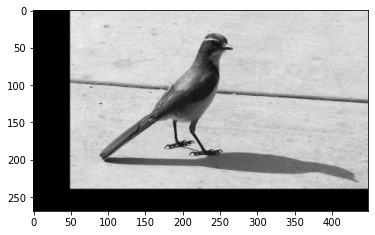

In [ ]:
plt.imshow(TransformacionAfin(img, m), "gray")

Mover 50 pixeles en $x$ y -30 en $y$.

In [ ]:
m = np.array([[1, 0, 50], [0 , 1, -30], [0, 0, 1]])
m

array([[  1,   0,  50],
       [  0,   1, -30],
       [  0,   0,   1]])

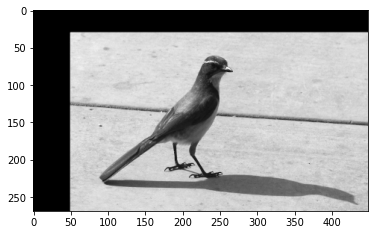

In [ ]:
plt.imshow(TransformacionAfin(img, m), "gray")

### Elongación

Elongación en $x$. Escalamos por 2.75 veces.

In [ ]:
m = np.array([[2.75, 0, 0], [0 , 1, 0], [0, 0, 1]])
m

array([[2.75, 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ]])

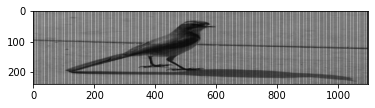

In [ ]:
plt.imshow(TransformacionAfin(img, m), "gray")

Elongación en $x$ y $y$. Escalamos por 0.25 veces $x$ y 0.7 veces $y$.

In [ ]:
m = np.array([[.25, 0, 0], [0 , .7, 0], [0, 0, 1]])
m

array([[0.25, 0.  , 0.  ],
       [0.  , 0.7 , 0.  ],
       [0.  , 0.  , 1.  ]])

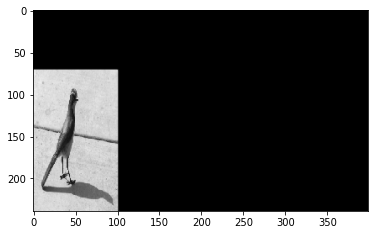

In [ ]:
plt.imshow(TransformacionAfin(img, m), "gray")

### Cizallamiento

Cizallamiento en $x$ ( recordamos que el cizallamiento quedaría como $x+tangente(-25.1) \cdot y$ ). Por lo tanto, entre más grande $y$ la traslación en $x$ será más evidente.

In [ ]:
m = np.array([[1, np.tan(np.radians(-25.1)), 0], [0 , 1, 0], [0, 0, 1]])
m

array([[ 1.        , -0.46843423,  0.        ],
       [ 0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

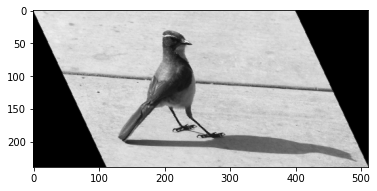

In [ ]:
plt.imshow(TransformacionAfin(img, m), "gray")

Cizallamiento en $x$ y $y$ ( recordamos que el cizallamiento quedaría como $x+tangente(-25.1) \cdot y$ & $y+tangente(-25.1) \cdot x$ ). 

Siguiendo la misma lógica que el anterior:entre más grande $x$ la traslación en $y$ será más evidente.

In [ ]:
m = np.array([[1, np.tan(np.radians(-25.1)), 0], [np.tan(np.radians(-25.1)) , 1, 0], [0, 0, 1]])
m

array([[ 1.        , -0.46843423,  0.        ],
       [-0.46843423,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

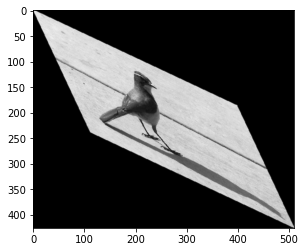

In [ ]:
plt.imshow(TransformacionAfin(img, m), "gray")

### Rotación

Rotación de 45 grados.

In [ ]:
m = np.array([[np.cos(np.radians(45.1)), np.sin(np.radians(45.1)), 0], [-np.sin(np.radians(45.1)) , np.cos(np.radians(45.1)), 0], [0, 0, 1]])
m

array([[ 0.70587157,  0.70833984,  0.        ],
       [-0.70833984,  0.70587157,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

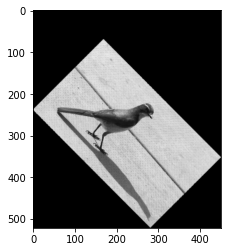

In [ ]:
plt.imshow(TransformacionAfin(img, m), "gray")

### Transformaciones anidadas.

In [ ]:
traslacion = np.array([[1, 0, 100],
                       [0 , 1, 0],
                       [0, 0, 1]])
elongacion = np.array([[1.5, 0, 0],
                       [0 , 0.7, 0],
                       [0, 0, 1]])
rotacion = np.array([[np.cos(np.radians(67.1)), np.sin(np.radians(67.1)), 0],
                     [-np.sin(np.radians(67.1)) , np.cos(np.radians(67.1)), 0],
                     [0, 0, 1]])
m = np.dot(np.dot(rotacion, elongacion), traslacion)
m

array([[  0.58368593,   1.38177811,  58.36859252],
       [ -0.64482978,   0.27238677, -64.48297839],
       [  0.        ,   0.        ,   1.        ]])

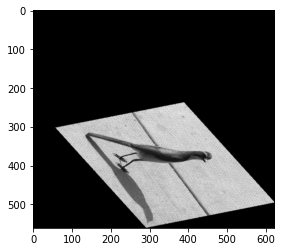

In [ ]:
plt.imshow(TransformacionAfin(img, m), "gray")

# Conclusiones


La ventaja de las transformaciones afines es que al ser matrices se puede hacer producto matricial de todas las matrices necesarias para el problema y hacer una sola operación sobre la imagen y no una operacion por matriz. Esta propiedad es de extrema ayuda en el problema de _transformaciones anidadas_ para poder crear todas las tranformaciones a partir de una matriz sin necesidad de tener que calcularla manualmente.

Por parte de la retoralimentación que se me dio para poder completar el proyecto, pude entender la necesidad de utilizar las herramientas optimizadas proporcionadas por Python y sus librerías para que nuestras implementaciones fueran mucho más rápidas al momento de ejecutarlas. Esto me ayudo a que mis ejecuciones reducieran el tiempo de ejecución hasta un 50%.

La transformación de coordenadas de matrices a coordenadas $R^2$ y las políticas para tratar los números flotantes resultantes de una elongación no entera, me llevaron una semana de comprender. Por ello, quiero dejar como aprendizaje personal que antes de empezar a programar debo comprender el problema, sus dificultades, su representación en computadora y su representación teórica para poder hacer la conexión entre ambas de ser necesario; y los casos extremos del problema, ya que antes solo planeaba el algoritmo.

# Referencias

 1. Montiel González, Carlos. (2019). Procesamiento digital de imágenes. [Blog]. Accedido de https://classroom.google.com/c/MTYxNjI3NzE3ODUy

 2. Hurtado Cruz, E. Transformaciones afines. Facultad de Ciencias de la UNAM.  Accedido de http://sistemas.fciencias.unam.mx/~erhc/geometria_analitica_20181/transformaciones_afines_perspectiva.pdf
